In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from collections import Counter
%matplotlib inline
import seaborn as sns; sns.set_theme()
import plotly.figure_factory as ff
from itertools import combinations
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [136]:
!pip install openpyxl plotly -q


[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
Calender = pd.read_excel(r"C:\Users\Anergha\Documents\Internship\UNIFIED MENTOR\Budget Sales data\AdventureWorks_Database.xlsx",sheet_name="Calender")

In [3]:
Calender.head(2)

,Date,DateKey,Year,Quarter,MonthNum,Month,FiscalYear,FiscalQuarter,FiscalMonthNum,FiscalMonth,MonthYear,MonthYearLong,MonthYearNum,WeekdayNum,Weekday,WeekdayWeekend
0,2016-04-03,20160403,2016,Q2,4,Apr,FY2016,FQ4,10,Apr,Apr-16,Apr-2016,201604,1,Sun,Weekend
1,2016-04-04,20160404,2016,Q2,4,Apr,FY2016,FQ4,10,Apr,Apr-16,Apr-2016,201604,2,Mon,Weekday


In [4]:
Customers = pd.read_excel(r"C:\Users\Anergha\Documents\Internship\UNIFIED MENTOR\Budget Sales data\AdventureWorks_Database.xlsx",sheet_name="Customers")
Customers.head(2)

,CustomerKey,FirstName,LastName,FullName,BirthDate,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,Education,Occupation,HouseOwnerFlag,NumberCarsOwned,AddressLine1,DateFirstPurchase,CommuteDistance
0,11000,Jon,Yang,"Yang, Jon",1966-04-08,M,M,90000,2,0,Bachelors,Professional,1,0,3761 N. 14th St,2014-01-22,1-2 Miles
1,11001,Eugene,Huang,"Huang, Eugene",1965-05-14,S,M,60000,3,3,Bachelors,Professional,0,1,2243 W St.,2014-01-18,0-1 Miles


In [5]:
Product = pd.read_excel(r"C:\Users\Anergha\Documents\Internship\UNIFIED MENTOR\Budget Sales data\AdventureWorks_Database.xlsx",sheet_name="Product")
Product.head(2)

,ProductKey,ProductName,SubCategory,Category,StandardCost,Color,ListPrice,DaysToManufacture,ProductLine,ModelName,Photo,ProductDescription,StartDate
0,1,Adjustable Race,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,http://www.avising.com/me/LearnPBI/DataSources...,NaN,1998-06-01
1,2,Bearing Ball,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,http://www.avising.com/me/LearnPBI/DataSources...,NaN,1998-06-01


In [6]:
Territory = pd.read_excel(r"C:\Users\Anergha\Documents\Internship\UNIFIED MENTOR\Budget Sales data\AdventureWorks_Database.xlsx",sheet_name="Territory")
Territory .head(2)

,SalesTerritoryKey,Region,Country,Group,RegionImage
0,1,Northwest,United States,North America,http://www.avising.com/me/LearnPBI/DataSources...
1,2,Northeast,United States,North America,http://www.avising.com/me/LearnPBI/DataSources...


In [7]:
Sales= pd.read_excel(r"C:\Users\Anergha\Documents\Internship\UNIFIED MENTOR\Budget Sales data\AdventureWorks_Database.xlsx",sheet_name="Sales")
Sales.head(2)

,ProductKey,OrderDate,ShipDate,CustomerKey,PromotionKey,SalesTerritoryKey,SalesOrderNumber,SalesOrderLineNumber,OrderQuantity,UnitPrice,TotalProductCost,SalesAmount,TaxAmt
0,310,2014-01-01,2014-01-08,21768,1,6,SO43697,1,2,1789.135,2171.2942,3578.27,286.2616
1,346,2014-01-01,2014-01-08,28389,1,7,SO43698,1,2,1699.995,1912.1544,3399.99,271.9992


In [8]:
Product_customer = Sales.merge(Customers,left_on='CustomerKey', right_on='CustomerKey')
Product_customer.head(3)

,ProductKey,OrderDate,ShipDate,CustomerKey,PromotionKey,SalesTerritoryKey,SalesOrderNumber,SalesOrderLineNumber,OrderQuantity,UnitPrice,...,YearlyIncome,TotalChildren,NumberChildrenAtHome,Education,Occupation,HouseOwnerFlag,NumberCarsOwned,AddressLine1,DateFirstPurchase,CommuteDistance
0,310,2014-01-01,2014-01-08,21768,1,6,SO43697,1,2,1789.135,...,70000,5,0,Bachelors,Management,1,3,601 Asilomar Dr.,2014-01-01,10+ Miles
1,346,2014-01-01,2014-01-08,28389,1,7,SO43698,1,2,1699.995,...,20000,3,3,High School,Manual,0,0,"14, avenue du Port",2014-01-01,0-1 Miles
2,346,2014-01-01,2014-01-08,25863,1,1,SO43699,1,2,1699.995,...,40000,5,0,High School,Professional,1,3,4193 E. 28th Street,2014-01-01,10+ Miles


In [9]:
Product_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58189 entries, 0 to 58188
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ProductKey            58189 non-null  int64         
 1   OrderDate             58189 non-null  datetime64[ns]
 2   ShipDate              58189 non-null  datetime64[ns]
 3   CustomerKey           58189 non-null  int64         
 4   PromotionKey          58189 non-null  int64         
 5   SalesTerritoryKey     58189 non-null  int64         
 6   SalesOrderNumber      58189 non-null  object        
 7   SalesOrderLineNumber  58189 non-null  int64         
 8   OrderQuantity         58189 non-null  int64         
 9   UnitPrice             58189 non-null  float64       
 10  TotalProductCost      58189 non-null  float64       
 11  SalesAmount           58189 non-null  float64       
 12  TaxAmt                58189 non-null  float64       
 13  FirstName       

Gender wise 

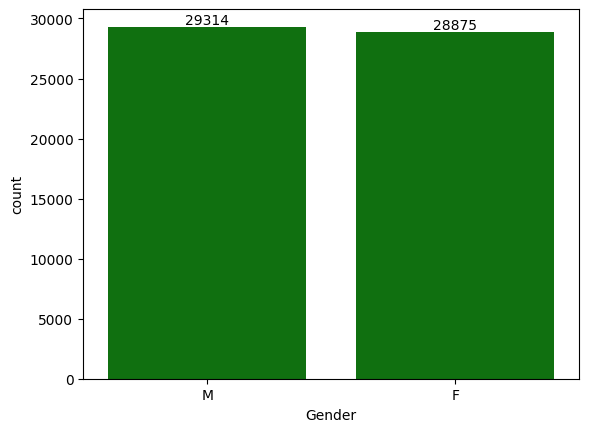

In [10]:
gender=sns.countplot(x='Gender',data=Product_customer,color="green")
for i in gender.containers:
    gender.bar_label(i)

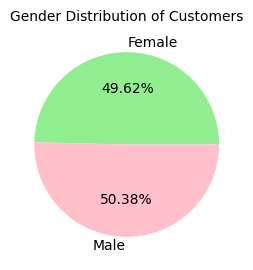

In [11]:
# Gendar Distribution of Customers by ploting pie chart
a= Product_customer.groupby(['Gender'])['SalesAmount'].count()
plt.figure(figsize=(3,3))
plt.pie(a,labels=['Female','Male'], autopct= '%0.2f%%',colors=["lightgreen","pink"])
plt.title('Gender Distribution of Customers', fontsize=10)
plt.show()

In [12]:
a= Product_customer.groupby(['Gender'])['SalesAmount'].sum()
a

Gender
F    1.478780e+07
M    1.452004e+07
Name: SalesAmount, dtype: float64

Marital status

In [13]:
marital=Product_customer.groupby('MaritalStatus')['CustomerKey'].count()
marital

MaritalStatus
M    31992
S    26197
Name: CustomerKey, dtype: int64

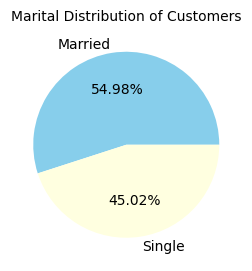

In [14]:
# Evaluting relationship between marital status and Sales by plot
plt.figure(figsize=(3,5))
plt.pie(marital,labels=['Married','Single'], autopct= '%0.2f%%',colors=["skyblue","lightyellow"])
plt.title('Marital Distribution of Customers', fontsize=10)
plt.show()

No of Children

Text(0.5, 1.0, 'Count of Customers vs Total Children')

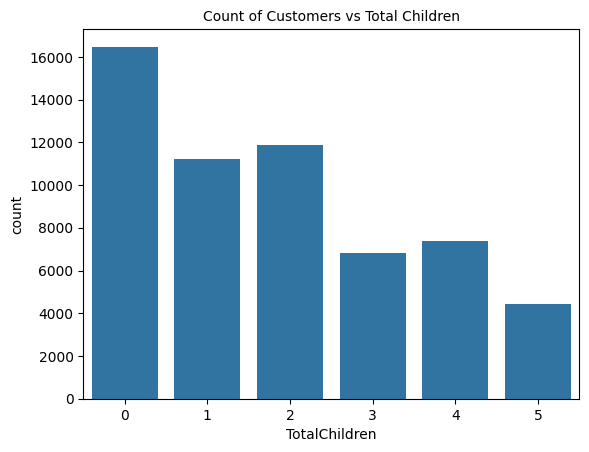

In [15]:
Total_children = sns.countplot(x='TotalChildren', data=Product_customer)
plt.title('Count of Customers vs Total Children', fontsize=10)

In [16]:
NumberChildrenAtHome = Product_customer.groupby(["NumberChildrenAtHome"])["CustomerKey"].count()
NumberChildrenAtHome

NumberChildrenAtHome
0    34294
1     7424
2     5208
3     3849
4     3991
5     3423
Name: CustomerKey, dtype: int64

Education and occupation of customers

<Axes: title={'center': 'Count of Customers vs Education'}, xlabel='Education', ylabel='count'>

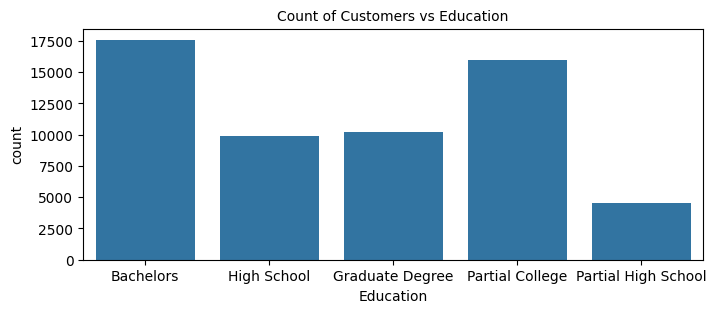

In [17]:
# Evaluting relationship between Education of customers and no of customers by plotting bar garph

plt.figure(figsize=(8,3))
plt.title('Count of Customers vs Education', fontsize=10)
sns.countplot(x='Education', data=Product_customer)

Commute Distance

<Axes: title={'center': 'Count of Customers vs Commute Distance'}, xlabel='CommuteDistance', ylabel='count'>

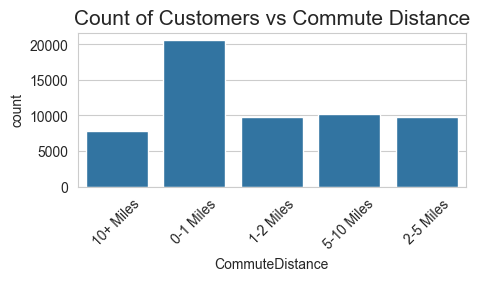

In [18]:
# Evaluting relationship between Commute Distance and no of customers by plotting bar garph

plt.figure(figsize=(5,2))
sns.set_style('whitegrid')
plt.xticks(rotation=45)
plt.title('Count of Customers vs Commute Distance', fontsize=15)
sns.countplot(x='CommuteDistance', data=Product_customer)

Yearly Income

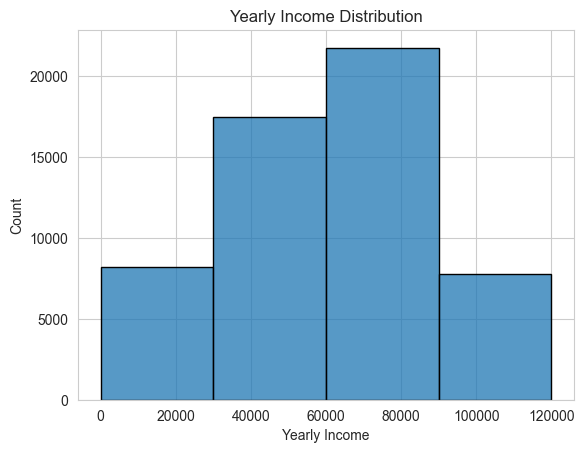

In [19]:
bins = [0, 30000, 60000, 90000, 120000]
sns.histplot(data=Product_customer,x="YearlyIncome",bins=bins,kde=False, edgecolor='black')
plt.title('Yearly Income Distribution')
plt.xlabel('Yearly Income')
plt.ylabel('Count')
plt.show()

In [20]:
# Category distribution of customers by plotting pie chart

category = Product.groupby(["Category"])["ProductKey"].count()
category

Category
Accessories     35
Bikes          125
Clothing        48
Components     189
Name: ProductKey, dtype: int64

In [21]:
Df = pd.merge(Sales,Customers,on="CustomerKey")
Df = pd.merge(Df,Product,on="ProductKey")
Df = pd.merge(Df,Territory,on="SalesTerritoryKey")
Df.head(2)

,ProductKey,OrderDate,ShipDate,CustomerKey,PromotionKey,SalesTerritoryKey,SalesOrderNumber,SalesOrderLineNumber,OrderQuantity,UnitPrice,...,DaysToManufacture,ProductLine,ModelName,Photo,ProductDescription,StartDate,Region,Country,Group,RegionImage
0,310,2014-01-01,2014-01-08,21768,1,6,SO43697,1,2,1789.135,...,4,Road,Road-150,http://www.avising.com/me/LearnPBI/DataSources...,This bike is ridden by race winners. Developed...,2005-07-01,Canada,Canada,North America,http://www.avising.com/me/LearnPBI/DataSources...
1,346,2014-01-01,2014-01-08,28389,1,7,SO43698,1,2,1699.995,...,4,Mountain,Mountain-100,http://www.avising.com/me/LearnPBI/DataSources...,Top-of-the-line competition mountain bike. Per...,2005-07-01,France,France,Europe,http://www.avising.com/me/LearnPBI/DataSources...


In [22]:
Df.shape

(58189, 45)

In [23]:
Df["CustomerKey"].nunique()

17918

In [24]:
category = Df.groupby(["Category"])["CustomerKey"].count()
category

Category
Accessories    34319
Bikes          15205
Clothing        8665
Name: CustomerKey, dtype: int64

Text(0.5, 1.0, 'Category Distribution of Customers')

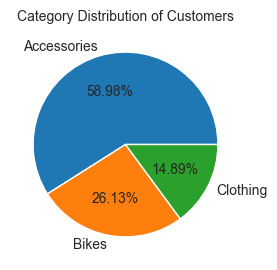

In [25]:
plt.figure(figsize=[5,3])
plt.pie(category,labels=["Accessories","Bikes","Clothing"],autopct='%0.2f%%')
plt.title('Category Distribution of Customers', fontsize=10)

<Axes: title={'center': 'Count of customers vs Sub category'}, xlabel='SubCategory', ylabel='count'>

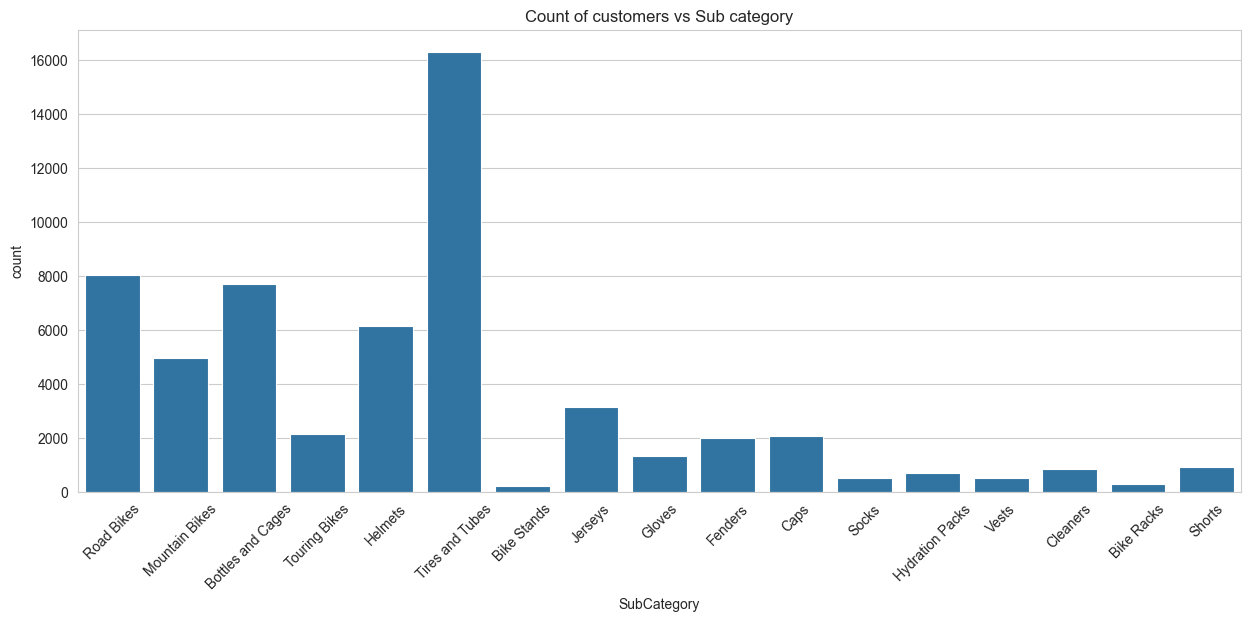

In [26]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=45)
plt.xticks(rotation=45)
plt.title('Count of customers vs Sub category')
sns.set_context("paper", font_scale=2)
sns.set_style('whitegrid')
sns.countplot(x='SubCategory',data=Df)

In [27]:
customer_country=Df.groupby('Country')['CustomerKey'].count()
customer_country

Country
Australia         12972
Canada             7142
France             5382
Germany            5460
United Kingdom     6709
United States     20524
Name: CustomerKey, dtype: int64

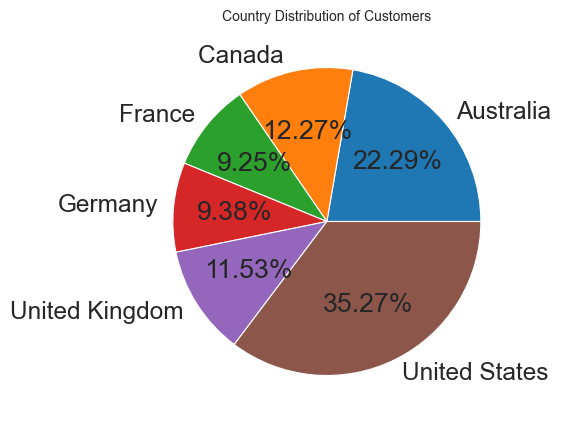

In [28]:
plt.figure(figsize=(6,5))
plt.pie(customer_country,labels=['Australia','Canada ','France','Germany','United Kingdom','United States'], autopct= '%0.2f%%')
plt.title('Country Distribution of Customers', fontsize=10)
plt.show()

<Axes: title={'center': 'Sales vs Yearly Income'}, xlabel='YearlyIncome', ylabel='Sales Amount'>

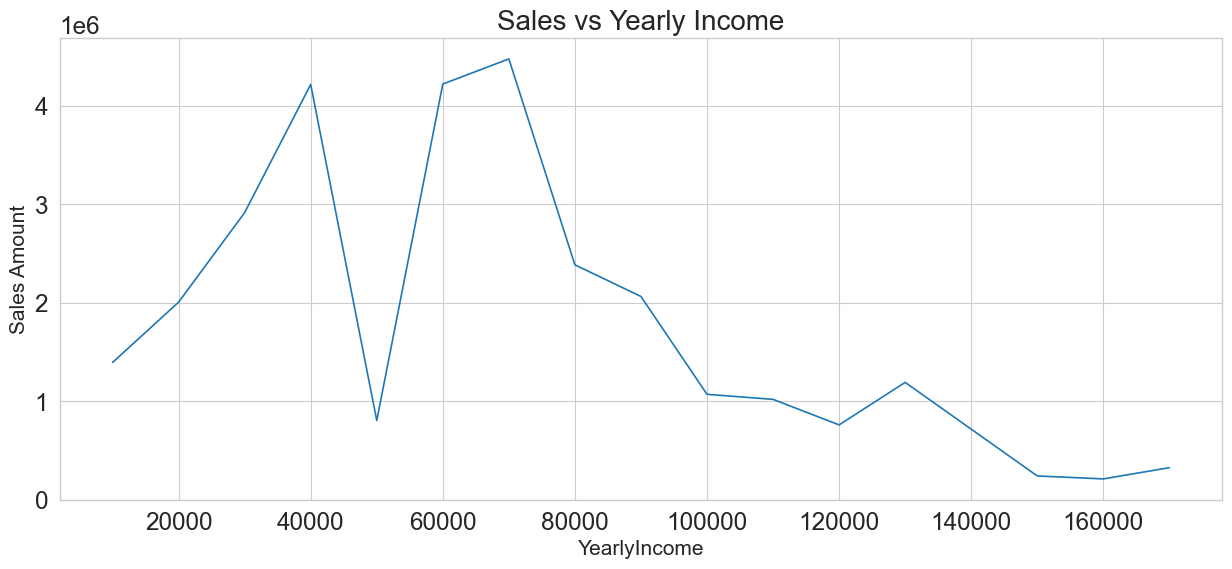

In [29]:
# Evaluting relationship between Country and Sales by ploting Line graph

salesYearlyIncome = Df.groupby('YearlyIncome').SalesAmount.sum()
plt.figure(figsize=(15,6))
plt.xlabel("Yearly Income", size=15)
plt.ylabel("Sales Amount", size=15)
plt.title('Sales vs Yearly Income', fontsize=20)
plt.grid()
salesYearlyIncome.plot(kind='line')

<Axes: title={'center': 'Sales vs Total Children'}, xlabel='TotalChildren', ylabel='Sales Amount'>

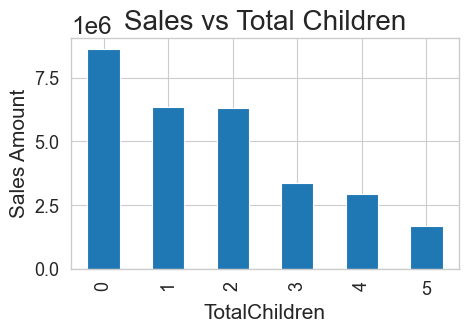

In [30]:
# Evaluting relationship between total children and Sales by ploting bar graph

salesTotalChildren = Df.groupby('TotalChildren').SalesAmount.sum()
plt.figure(figsize=(5,3))
plt.xlabel("TotalChildren", size=15)
plt.ylabel("Sales Amount", size=15)
plt.xticks(fontsize= 13)
plt.yticks(fontsize= 13)
plt.title('Sales vs Total Children', fontsize=20)
plt.grid()
salesTotalChildren.plot(kind='bar')

<Axes: title={'center': 'Sales vs Occupation'}, xlabel='Occupation', ylabel='Sales Amount'>

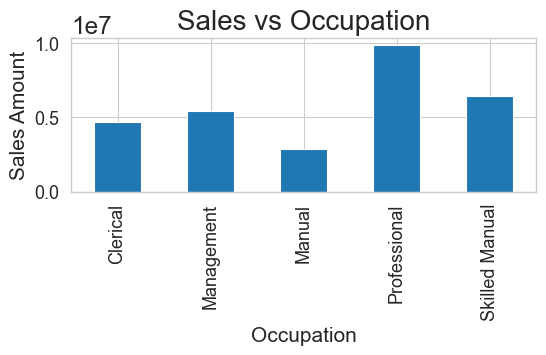

In [31]:
# Evaluting relationship between Occupation and Sales by ploting bar graph

salesOccupation = Df.groupby('Occupation').SalesAmount.sum()
plt.figure(figsize=(6,2))
plt.xlabel("Occupation", size=15)
plt.ylabel("Sales Amount", size=15)
plt.xticks(fontsize= 13)
plt.yticks(fontsize= 13)
plt.title('Sales vs Occupation', fontsize=20)
plt.grid()
salesOccupation.plot(kind='bar')

<Axes: title={'center': 'Sales vs Commute Distance'}, xlabel='CommuteDistance', ylabel='Sales Amount'>

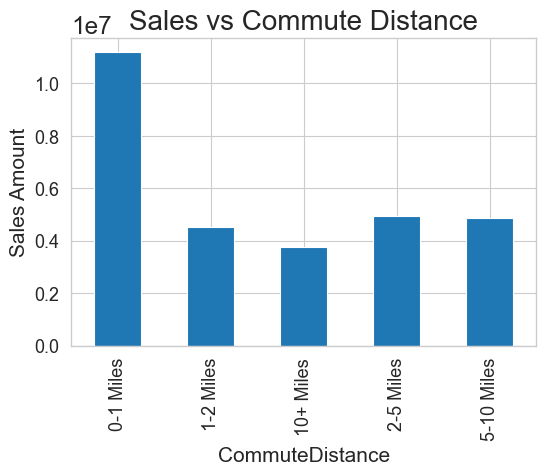

In [32]:
# Evaluting relationship between Commute Distance and Sales by ploting bar graph

salesCommuteDistance = Df.groupby('CommuteDistance').SalesAmount.sum()
plt.figure(figsize=(6,4))
plt.xlabel("CommuteDistance", size=15)
plt.ylabel("Sales Amount", size=15)
plt.xticks(fontsize= 13)
plt.yticks(fontsize= 13)
plt.title('Sales vs Commute Distance', fontsize=20)
plt.grid()
salesCommuteDistance.plot(kind='bar')

<Axes: title={'center': 'Sales vs Sub Category'}, xlabel='SubCategory', ylabel='Sales Amount'>

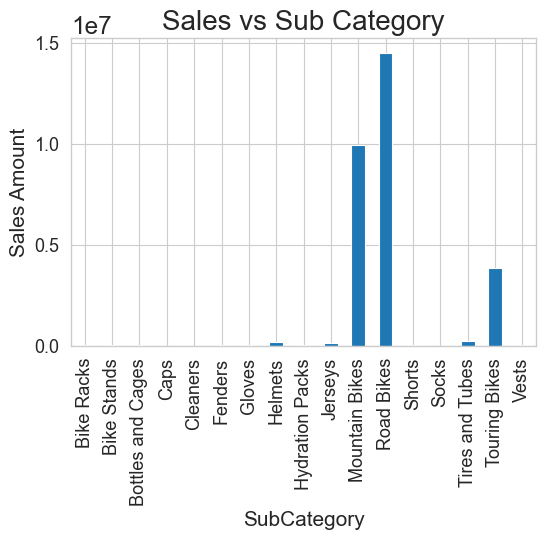

In [33]:
# Evaluting relationship between Sub Category and Sales by ploting bar graph

salesSubCategory = Df.groupby('SubCategory').SalesAmount.sum()
plt.figure(figsize=(6,4))
plt.xlabel("SubCategory", size=15)
plt.ylabel("Sales Amount", size=15)
plt.xticks(fontsize= 13)
plt.yticks(fontsize= 13)
plt.title('Sales vs Sub Category', fontsize=20)
plt.grid()
salesSubCategory.plot(kind='bar')

<Axes: xlabel='OrderDate'>

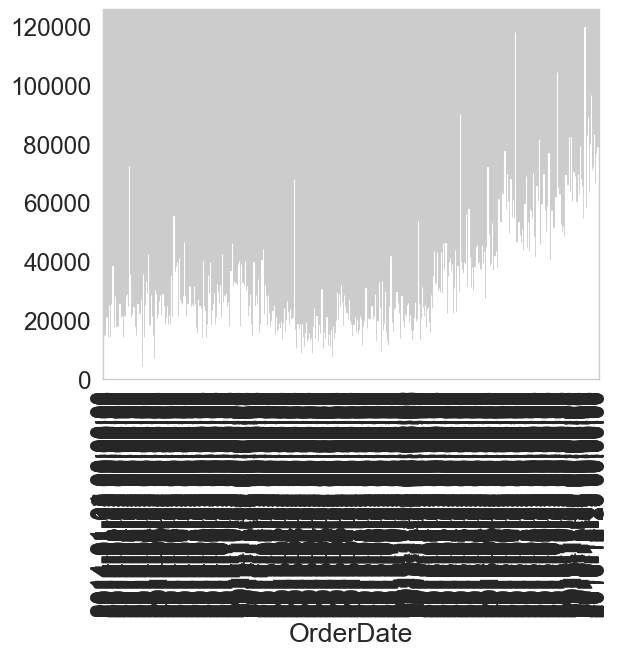

In [40]:
sale_year = Df.groupby('OrderDate')['SalesAmount'].sum().plot(kind='bar', color='#374045')
sale_year
#.plot(kind='bar', color='#374045');

In [44]:
date_df = pd.merge(Df, Calender , left_on ="OrderDate", right_on= "Date")
date_df

,ProductKey,OrderDate,ShipDate,CustomerKey,PromotionKey,SalesTerritoryKey,SalesOrderNumber,SalesOrderLineNumber,OrderQuantity,UnitPrice,...,FiscalYear,FiscalQuarter,FiscalMonthNum,FiscalMonth,MonthYear,MonthYearLong,MonthYearNum,WeekdayNum,Weekday,WeekdayWeekend
0,310,2014-01-01,2014-01-08,21768,1,6,SO43697,1,2,1789.1350,...,FY2014,FQ3,7,Jan,Jan-14,Jan-2014,201401,4,Wed,Weekday
1,346,2014-01-01,2014-01-08,28389,1,7,SO43698,1,2,1699.9950,...,FY2014,FQ3,7,Jan,Jan-14,Jan-2014,201401,4,Wed,Weekday
2,346,2014-01-01,2014-01-08,25863,1,1,SO43699,1,2,1699.9950,...,FY2014,FQ3,7,Jan,Jan-14,Jan-2014,201401,4,Wed,Weekday
3,336,2014-01-01,2014-01-08,14501,1,4,SO43700,1,2,349.5491,...,FY2014,FQ3,7,Jan,Jan-14,Jan-2014,201401,4,Wed,Weekday
4,346,2014-01-01,2014-01-08,11003,1,9,SO43701,1,2,1699.9950,...,FY2014,FQ3,7,Jan,Jan-14,Jan-2014,201401,4,Wed,Weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58184,561,2016-12-30,2017-01-07,13650,1,9,SO74145,1,1,2384.0700,...,FY2017,FQ2,6,Dec,Dec-16,Dec-2016,201612,6,Fri,Weekday
58185,584,2016-12-30,2017-01-07,26916,1,9,SO74146,1,1,539.9900,...,FY2017,FQ2,6,Dec,Dec-16,Dec-2016,201612,6,Fri,Weekday
58186,605,2016-12-30,2017-01-07,27473,1,9,SO74147,1,1,539.9900,...,FY2017,FQ2,6,Dec,Dec-16,Dec-2016,201612,6,Fri,Weekday
58187,538,2016-12-30,2017-01-07,27473,1,9,SO74147,2,1,21.4900,...,FY2017,FQ2,6,Dec,Dec-16,Dec-2016,201612,6,Fri,Weekday


In [51]:
sale_year = date_df.groupby('Year')['SalesAmount'].count()
sale_year

Year
2014     2206
2015     3222
2016    52761
Name: SalesAmount, dtype: int64

<Axes: xlabel='Year'>

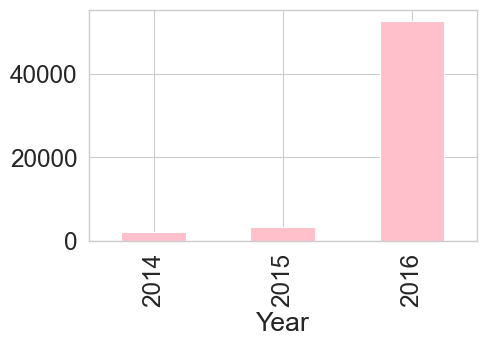

In [57]:
sale_year.plot(kind='bar', color='pink',figsize=[5,3])

<Axes: xlabel='Date'>

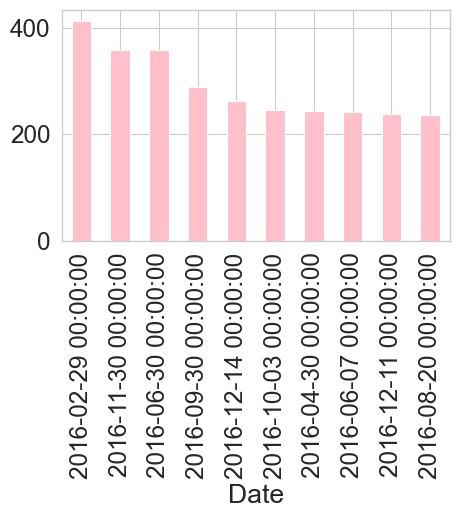

In [59]:
sale_date = date_df.groupby('Date')['SalesAmount'].count().sort_values(ascending=False).head(10).plot(kind='bar', color='pink',figsize=[5,3])
sale_date

In [65]:
top_selling_product = Df.groupby(['Category', 'SubCategory', 'ProductName'])['OrderQuantity'].sum().to_frame()
top_selling_product

OrderQuantity
Category    SubCategory       ProductName                          
Accessories Bike Racks        Hitch Rack - 4-Bike               493
            Bike Stands       All-Purpose Bike Stand            394
            Bottles and Cages Mountain Bottle Cage             2977
                              Road Bottle Cage                 2708
                              Water Bottle - 30 oz.            6370
...                                                             ...
Clothing    Socks             Racing Socks, L                   400
                              Racing Socks, M                   456
            Vests             Classic Vest, L                   273
                              Classic Vest, M                   301
                              Classic Vest, S                   250

[130 rows x 1 columns]

<Axes: xlabel='ProductName', ylabel='OrderQuantity'>

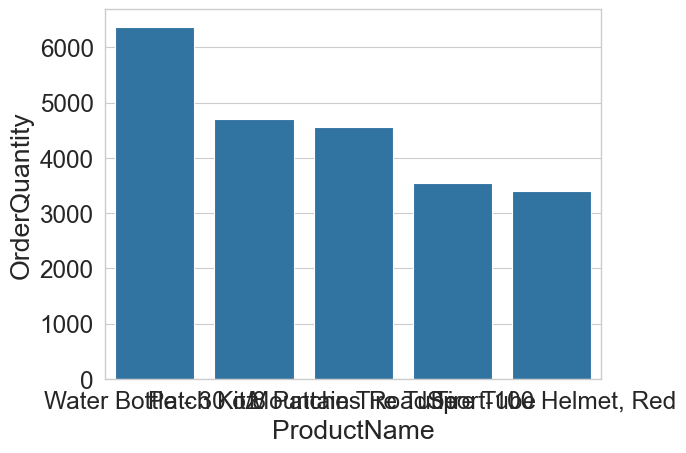

In [67]:
top_selling_product = Df.groupby(['Category', 'SubCategory', 'ProductName'])['OrderQuantity'].sum().nlargest(5).to_frame()
top_selling_product.reset_index(inplace=True)
sns.barplot(x='ProductName', y='OrderQuantity',data=top_selling_product)


In [69]:
cat_subcat_qty = date_df.groupby(['Year','Category', 'SubCategory'])['OrderQuantity'].sum().to_frame()
cat_subcat_qty = cat_subcat_qty.sort_values(['Year', 'Category'], ascending=True)
cat_subcat_qty.style.bar(subset=['OrderQuantity'])

<Axes: xlabel='Country'>

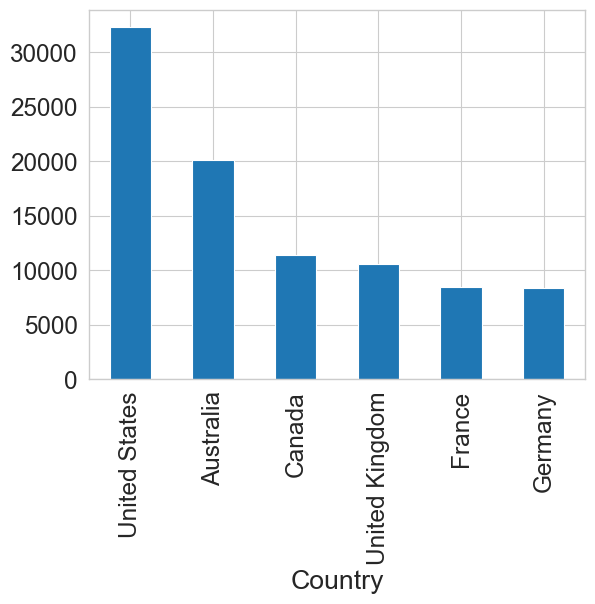

In [71]:
country_qty_sales = Df.groupby('Country')['OrderQuantity'].sum().sort_values(ascending=False)
country_qty_sales.plot(kind='bar')

In [79]:
date_df['profit'] = (date_df['UnitPrice']*date_df['OrderQuantity']) - date_df['TotalProductCost']
date_df.head(2)

,ProductKey,OrderDate,ShipDate,CustomerKey,PromotionKey,SalesTerritoryKey,SalesOrderNumber,SalesOrderLineNumber,OrderQuantity,UnitPrice,...,FiscalQuarter,FiscalMonthNum,FiscalMonth,MonthYear,MonthYearLong,MonthYearNum,WeekdayNum,Weekday,WeekdayWeekend,profit
0,310,2014-01-01,2014-01-08,21768,1,6,SO43697,1,2,1789.135,...,FQ3,7,Jan,Jan-14,Jan-2014,201401,4,Wed,Weekday,1406.9758
1,346,2014-01-01,2014-01-08,28389,1,7,SO43698,1,2,1699.995,...,FQ3,7,Jan,Jan-14,Jan-2014,201401,4,Wed,Weekday,1487.8356


In [80]:
cat_subcat_profit = date_df.groupby(['Year','Category', 'SubCategory'])['profit'].sum().to_frame()

#Sorting the results
cat_subcat_profit = cat_subcat_profit.sort_values(['Year', 'Category'], ascending=True)
cat_subcat_profit.style.bar(subset=['profit'])

In [81]:
date_df.groupby(['Category', 'SubCategory','ProductName'])['profit'].sum().nsmallest(10).to_frame()

profit
Category    SubCategory     ProductName                              
Clothing    Socks           Racing Socks, L                 1474.4574
                            Racing Socks, M                 1581.3837
Accessories Cleaners        Bike Wash - Dissolver           4299.8688
            Tires and Tubes Patch Kit/8 Patches             4314.8350
Clothing    Caps            AWC Logo Cap                    4331.8315
Accessories Tires and Tubes Touring Tire Tube               4363.8089
Clothing    Jerseys         Long-Sleeve Logo Jersey, XL     4495.6007
                            Short-Sleeve Classic Jersey, L  4544.8782
                            Long-Sleeve Logo Jersey, S      4610.5777
                            Short-Sleeve Classic Jersey, M  4793.2322

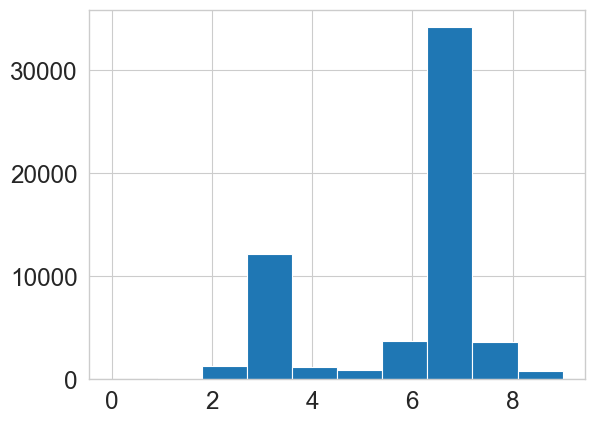

In [84]:
date_df['OrderreadyDate'] = date_df['OrderDate'] + pd.to_timedelta(date_df['DaysToManufacture'], unit='D')

# Check the delay between order shipment date and order ready to supply
date_df['shipping_efficiency'] = (date_df['ShipDate'] - date_df['OrderreadyDate']).dt.days

plt.hist(data=date_df, x="shipping_efficiency",)
plt.show()

In [85]:
# Calculate Age
date_df['Age'] = date_df['OrderDate'].dt.year - date_df['BirthDate'].dt.year

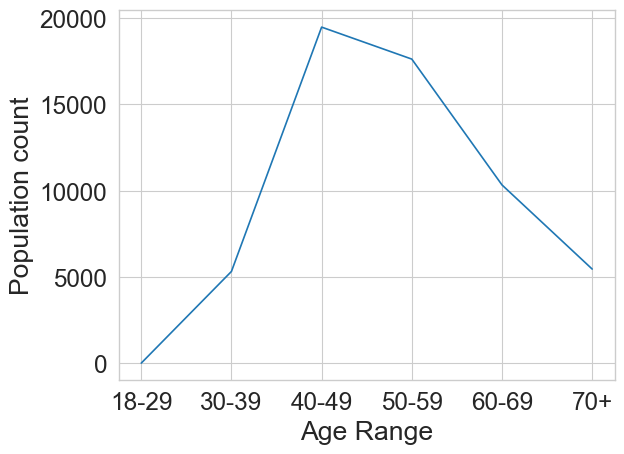

In [91]:

bins = [18, 30, 40, 50, 60, 70, 120]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']
date_df['agerange'] = pd.cut(date_df.Age, bins, labels = labels,include_lowest = True)

age_distribution = date_df['agerange'].value_counts().to_frame().reset_index()

age_distribution.columns = ['Age Range','Population count']

sns.lineplot( x='Age Range', y='Population count',data=age_distribution)
plt.show()

C:\Users\Anergha\AppData\Local\Temp\ipykernel_11528\486561233.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group = date_df.groupby('agerange')['SalesAmount'].mean().to_frame()


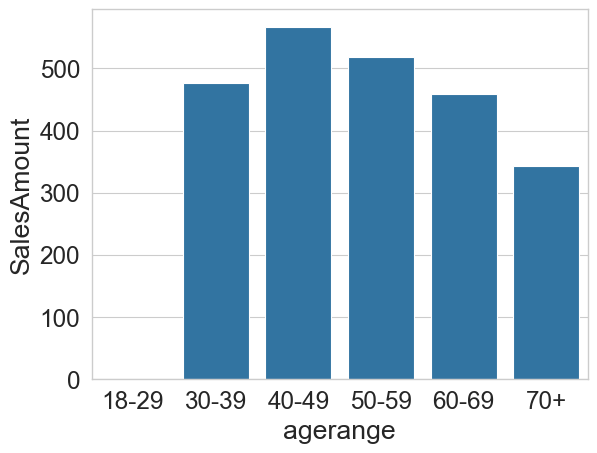

In [92]:
#AGE GROUP
age_group = date_df.groupby('agerange')['SalesAmount'].mean().to_frame()
#age_group.reset_index(inplace=True)
sns.barplot(data=age_group, x='agerange', y='SalesAmount')
plt.show()

In [93]:
def create_bins(lower_bound, width, quantity):
    """ create_bins returns an equal-width (distance) partitioning. 
        It returns an ascending list of tuples, representing the intervals.
        A tuple bins[i], i.e. (bins[i][0], bins[i][1])  with i > 0 
        and i < quantity, satisfies the following conditions:
            (1) bins[i][0] + width == bins[i][1]
            (2) bins[i-1][0] + width == bins[i][0] and
                bins[i-1][1] + width == bins[i][1]
    """
    

    bins = []
    for low in range(lower_bound, 
                     lower_bound + quantity*width + 1, width):
        bins.append((low, low+width))
    return bins

In [94]:
bins = create_bins(lower_bound=10000,
                   width=30000,
                   quantity=5)
bins2 = pd.IntervalIndex.from_tuples(bins)
date_df['salary_range'] = pd.cut(date_df['YearlyIncome'], bins2)

C:\Users\Anergha\AppData\Local\Temp\ipykernel_11528\1132826236.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_salary = date_df.groupby('salary_range')['SalesAmount'].mean().to_frame()


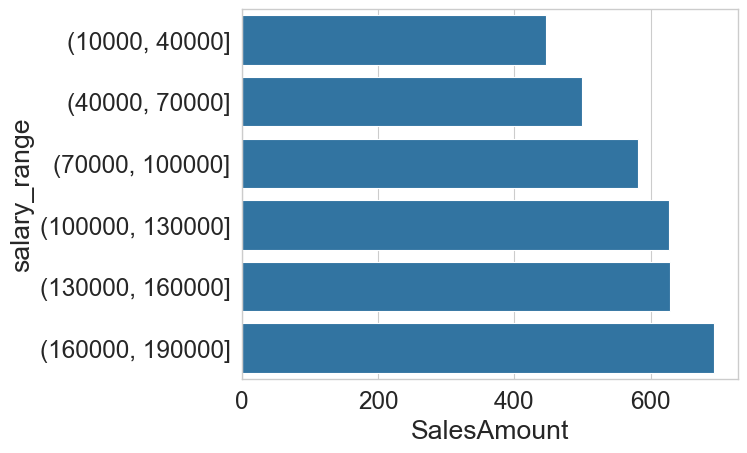

In [95]:
df_salary = date_df.groupby('salary_range')['SalesAmount'].mean().to_frame()
df_salary.reset_index(inplace=True)
sns.barplot(x="SalesAmount", y="salary_range", data=df_salary)
plt.show()

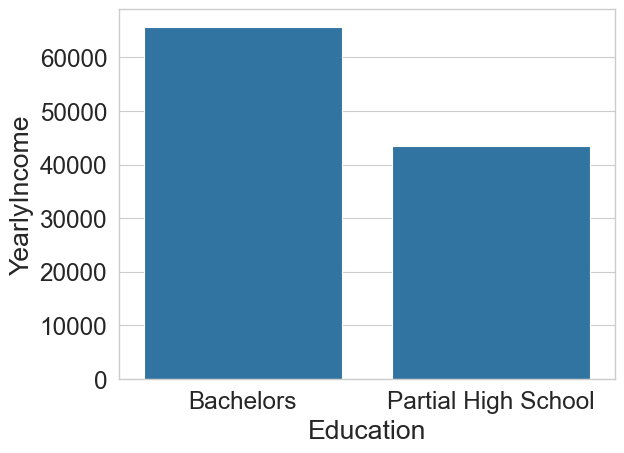

In [96]:
df_education = date_df[(date_df['Education']=='Partial High School')|(date_df['Education']=='Bachelors')].groupby('Education')['YearlyIncome'].mean().to_frame()
df_education.reset_index(inplace=True)
sns.barplot(data=df_education, x='Education', y='YearlyIncome')
plt.show()

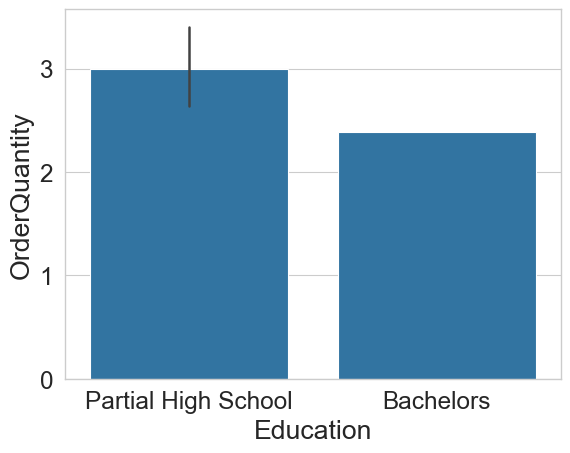

In [97]:
df_edu = date_df[(date_df['Education']=='Partial High School')|(date_df['Education']=='Bachelors')]
df_edu = df_edu.groupby(['Education','ProductName'])['OrderQuantity'].mean().to_frame().sort_values('OrderQuantity', ascending=False)[:10]
df_edu.reset_index(inplace=True)
sns.barplot(data=df_edu, x="Education",
             y="OrderQuantity")
plt.show()

In [99]:
category_subcategory_qty = date_df.groupby(['Year','Category', 'SubCategory'])['OrderQuantity'].sum().to_frame()
category_subcategory_qty = category_subcategory_qty.sort_values(['Year', 'Category'], ascending=True)
category_subcategory_qty.style.bar(subset=['OrderQuantity'], color='#D9B300')

In [101]:
cat_subcat_profit = date_df.groupby(['Year','Category', 'SubCategory'])['profit'].sum().to_frame()

#Sorting the results
cat_subcat_profit = cat_subcat_profit.sort_values(['Year', 'Category'], ascending=True)
cat_subcat_profit.style.bar(subset=['profit'], color='#D9B300')

In [102]:
non_profitable = date_df.groupby(['Category', 'SubCategory','ProductName'])['profit'].sum().nsmallest(10).to_frame()
non_profitable

profit
Category    SubCategory     ProductName                              
Clothing    Socks           Racing Socks, L                 1474.4574
                            Racing Socks, M                 1581.3837
Accessories Cleaners        Bike Wash - Dissolver           4299.8688
            Tires and Tubes Patch Kit/8 Patches             4314.8350
Clothing    Caps            AWC Logo Cap                    4331.8315
Accessories Tires and Tubes Touring Tire Tube               4363.8089
Clothing    Jerseys         Long-Sleeve Logo Jersey, XL     4495.6007
                            Short-Sleeve Classic Jersey, L  4544.8782
                            Long-Sleeve Logo Jersey, S      4610.5777
                            Short-Sleeve Classic Jersey, M  4793.2322

In [116]:
import plotly.express as px
month_sales = date_df.groupby('Month')[['SalesAmount', 'profit']].sum()
month_sales.reset_index(inplace=True)
fig = px.bar(month_sales, x='Month', y='SalesAmount',text_auto='.2s',
             hover_data=['Month', 'SalesAmount'], color='profit',
             height=400)
fig.show()


In [117]:
# Extracting day_name from OrderDate
date_df['sale_day_name'] = date_df['OrderDate'].dt.day_name()
date_df.head(5)

,ProductKey,OrderDate,ShipDate,CustomerKey,PromotionKey,SalesTerritoryKey,SalesOrderNumber,SalesOrderLineNumber,OrderQuantity,UnitPrice,...,WeekdayNum,Weekday,WeekdayWeekend,profit,OrderreadyDate,shipping_efficiency,Age,agerange,salary_range,sale_day_name
0,310,2014-01-01,2014-01-08,21768,1,6,SO43697,1,2,1789.1350,...,4,Wed,Weekday,1406.9758,2014-01-05,3,68,60-69,"(40000, 70000]",Wednesday
1,346,2014-01-01,2014-01-08,28389,1,7,SO43698,1,2,1699.9950,...,4,Wed,Weekday,1487.8356,2014-01-05,3,50,40-49,"(10000, 40000]",Wednesday
2,346,2014-01-01,2014-01-08,25863,1,1,SO43699,1,2,1699.9950,...,4,Wed,Weekday,1487.8356,2014-01-05,3,68,60-69,"(10000, 40000]",Wednesday
3,336,2014-01-01,2014-01-08,14501,1,4,SO43700,1,2,349.5491,...,4,Wed,Weekday,285.9519,2014-01-05,3,76,70+,"(70000, 100000]",Wednesday
4,346,2014-01-01,2014-01-08,11003,1,9,SO43701,1,2,1699.9950,...,4,Wed,Weekday,1487.8356,2014-01-05,3,46,40-49,"(40000, 70000]",Wednesday


In [118]:
sales_by_week = date_df.groupby(['sale_day_name']).count()['SalesAmount'].reset_index().sort_values('SalesAmount', ascending=False)

fig = px.line(sales_by_week, x='sale_day_name', y='SalesAmount', title='Sales Frequency by week')
fig.update_layout(
    autosize=True,
    width=300,
    height=300,
    margin=dict(
        l=25,
        r=25,
        b=10,
        t=10,
    ),
    font=dict(size=7))
fig.show()

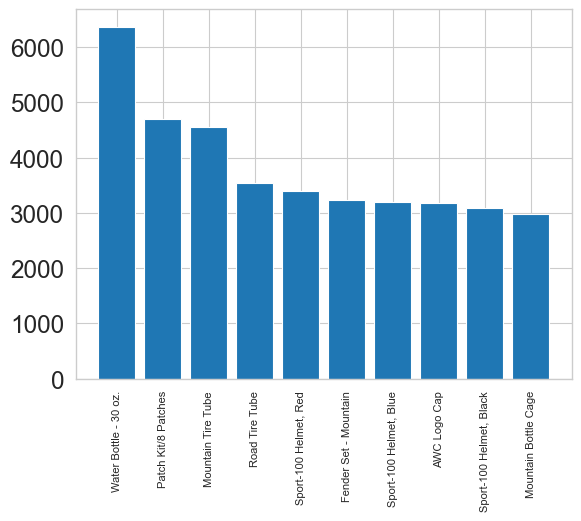

In [123]:
product_group = date_df.groupby('ProductName')
quantity_ordered = product_group['OrderQuantity'].sum().sort_values(ascending=False)[:10]
products = quantity_ordered.index.tolist()

plt.bar(products, quantity_ordered, )
plt.xticks(products, rotation='vertical', size=8)
plt.show()

In [127]:
prices = date_df.groupby('ProductName')['UnitPrice'].mean()
prices = prices[products]
prices

ProductName
Water Bottle - 30 oz.       4.107323
Patch Kit/8 Patches         1.888299
Mountain Tire Tube          4.119581
Road Tire Tube              3.236023
Sport-100 Helmet, Red      28.667388
Fender Set - Mountain      17.849201
Sport-100 Helmet, Blue     28.717150
AWC Logo Cap                7.503110
Sport-100 Helmet, Black    28.934376
Mountain Bottle Cage        8.296692
Name: UnitPrice, dtype: float64

C:\Users\Anergha\AppData\Local\Temp\ipykernel_11528\3247503786.py:10: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



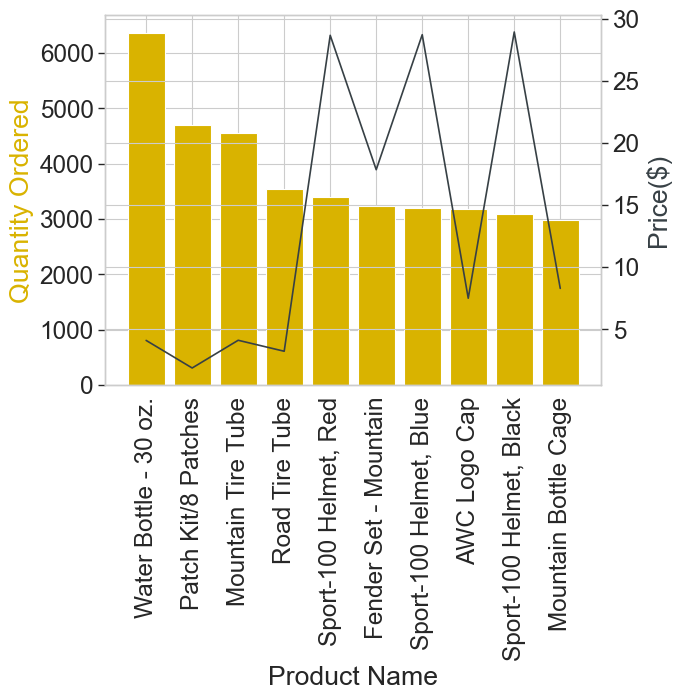

In [128]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='#D9B300')
ax2.plot(products, prices, '#374045')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='#D9B300')
ax2.set_ylabel('Price($)', color='#374045')
ax1.set_xticklabels(products, rotation='vertical')

plt.show();

In [129]:
prices.corr(quantity_ordered)

-0.5333019792658484

In [131]:
# By setting keep on False, all duplicates are True since we only want repeated order number
duplicate_order = date_df[date_df['SalesOrderNumber'].duplicated(keep=False)]
duplicate_order

,ProductKey,OrderDate,ShipDate,CustomerKey,PromotionKey,SalesTerritoryKey,SalesOrderNumber,SalesOrderLineNumber,OrderQuantity,UnitPrice,...,WeekdayNum,Weekday,WeekdayWeekend,profit,OrderreadyDate,shipping_efficiency,Age,agerange,salary_range,sale_day_name
5428,380,2016-01-01,2016-01-08,18239,1,9,SO51176,1,1,2443.35,...,6,Fri,Weekday,888.4021,2016-01-05,3,47,40-49,"(70000, 100000]",Friday
5429,479,2016-01-01,2016-01-08,18239,1,9,SO51176,2,1,8.99,...,6,Fri,Weekday,5.6277,2016-01-01,7,47,40-49,"(70000, 100000]",Friday
5430,577,2016-01-01,2016-01-08,27873,1,9,SO51177,1,1,1214.85,...,6,Fri,Weekday,459.6992,2016-01-05,3,38,30-39,"(10000, 40000]",Friday
5431,217,2016-01-01,2016-01-08,27873,1,9,SO51177,2,1,34.99,...,6,Fri,Weekday,21.9037,2016-01-01,7,38,30-39,"(10000, 40000]",Friday
5432,353,2016-01-01,2016-01-08,11245,2,8,SO51178,1,1,2319.99,...,6,Fri,Weekday,1054.3705,2016-01-05,3,60,50-59,"(100000, 130000]",Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58182,574,2016-12-30,2017-01-07,12314,1,8,SO74144,1,1,2384.07,...,6,Fri,Weekday,902.1321,2017-01-03,4,63,60-69,"(100000, 130000]",Friday
58183,222,2016-12-30,2017-01-07,12314,1,8,SO74144,2,1,34.99,...,6,Fri,Weekday,21.9037,2016-12-30,8,63,60-69,"(100000, 130000]",Friday
58186,605,2016-12-30,2017-01-07,27473,1,9,SO74147,1,1,539.99,...,6,Fri,Weekday,196.3404,2017-01-03,4,68,60-69,"(10000, 40000]",Friday
58187,538,2016-12-30,2017-01-07,27473,1,9,SO74147,2,1,21.49,...,6,Fri,Weekday,13.4527,2016-12-30,8,68,60-69,"(10000, 40000]",Friday


In [132]:
# Group the data based on sales order number and product name because the products
# that bought together will have share same order number
duplicate_order['grouped'] = date_df.groupby('SalesOrderNumber')['ProductName'].transform(lambda x: ','.join(x))
duplicate_order = duplicate_order[['SalesOrderNumber', 'grouped']].drop_duplicates()

C:\Users\Anergha\AppData\Local\Temp\ipykernel_11528\752080989.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [137]:
from collections import Counter
count = Counter()

for row in duplicate_order['grouped']:
    row_list  = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
for key, value in count.most_common(10):
    print(key, value)

('Sport-100 Helmet', ' Red') 2092
('Sport-100 Helmet', ' Blue') 1981
('Sport-100 Helmet', ' Black') 1935
('Mountain Tire Tube', 'Sport-100 Helmet') 1240
('Mountain Bottle Cage', 'Water Bottle - 30 oz.') 1210
('Water Bottle - 30 oz.', 'Sport-100 Helmet') 1056
('Road Bottle Cage', 'Water Bottle - 30 oz.') 927
('Road Tire Tube', 'Sport-100 Helmet') 815
('Mountain Tire Tube', 'Patch Kit/8 Patches') 737
('Water Bottle - 30 oz.', 'Road Bottle Cage') 586


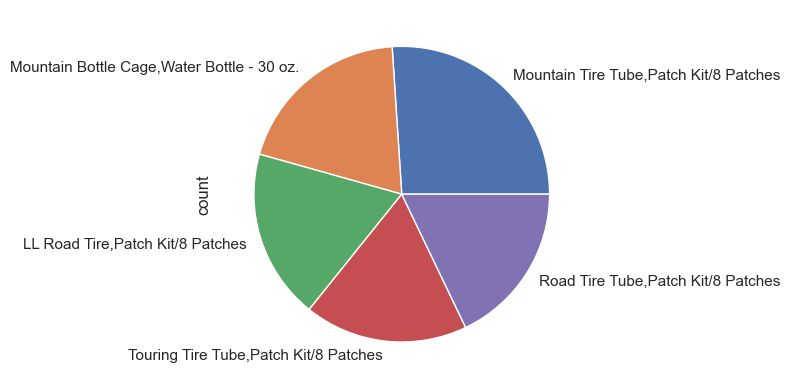

In [138]:
count =duplicate_order['grouped'].value_counts()[0:5].plot.pie()

In [140]:
fig = px.imshow(date_df.groupby(["Gender", "HouseOwnerFlag"])["SalesAmount"].mean().unstack(),
                labels=dict(color="Average Purchase"))
fig.show()

In [141]:
male = date_df[date_df["Gender"]=="M"]
female =date_df[date_df["Gender"]=="F"]

In [143]:
male_ord_qty = male.groupby(['ProductName'],as_index=False)['OrderQuantity'].sum().nlargest(5,'OrderQuantity').sort_values('ProductName')
male_ord_qty.columns=['ProductName','Order_Qty_Male']

female_ord_qty = female.groupby(['ProductName'],as_index=False)['OrderQuantity'].sum().nlargest(5,'OrderQuantity').sort_values('ProductName')
female_ord_qty.columns=['ProductName','Order_Qty_Female']

Gender_merge = pd.merge(male_ord_qty, female_ord_qty, on='ProductName')

In [144]:
fig = px.line(Gender_merge, x="ProductName", y=["Order_Qty_Male","Order_Qty_Female"])
fig.update_layout(
    autosize=True,
    width=800,
    height=400)
fig.show()

### Education, Occupation and Purchase correlation

In [146]:
fig = px.imshow(date_df.groupby(["Education", "Occupation"])["SalesAmount"].mean().unstack(),
                labels=dict(color="Average Purchase"))
fig.show()

In [147]:
bins = [18000, 30000, 70000,100000, 130000, 160000, 200000]
labels = ['5000-29999', '30000-69999', '70000-99999', '100000-129999', '130000-159999', '160000+']
date_df['salaryrange'] = pd.cut(date_df.YearlyIncome, bins, labels = labels,include_lowest = True)

salary_distribution = date_df['salaryrange'].value_counts().to_frame().reset_index()

salary_distribution.columns = ['Salary Range','Population Count']

fig = px.bar(salary_distribution, x='Salary Range', y='Population Count', color_discrete_sequence=['#374045'])
fig.update_layout(
    autosize=True,
    width=500,
    height=500,
    font=dict(size=10))
fig.show()

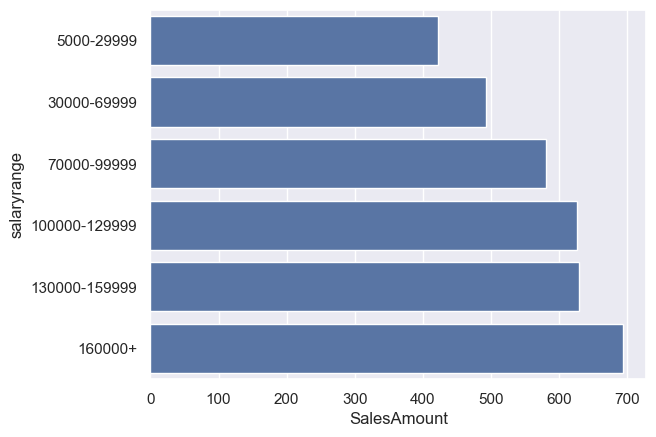

In [148]:
incomerange = date_df.groupby('salaryrange')['SalesAmount'].mean().to_frame()
incomerange.reset_index(inplace=True)
sns.barplot(x="SalesAmount", y="salaryrange", data=incomerange);